In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline

In [6]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

def run_mean(files):
    i = 0
    rt = pd.DataFrame()
    for fname in files:
        with open(fname) as f:
            data = json.load(f)
            for line in data['stdout_lines']:
                if "started" in line:
                    start = line.split()[4]
                if "finished" in line:
                    end = line.split()[4]            
            rt['run' + str(i)] = [to_seconds(end) - to_seconds(start)]
            i = i + 1
    return rt.mean(axis=1), rt.std(axis=1)

mean = pd.DataFrame(columns=("cache", "nocache"))
stds = pd.DataFrame(columns=("cache", "nocache"))
count = 0
, s = run_mean(glob.glob('experiments/kernel/consistency/results/nojournal-cache/mdtest-interfere-198000*'))
= m
stds['interfere'] = s
m, s = run_mean(glob.glob('experiments/kernel/consistency/results/nojournal-cache/mdtest-interfere-198000*'))
#for i in [2, 4, 6]:
#    c_mean, c_std = run_mean(glob.glob('experiments/kernel/droplease-cache/results/mdtest-stat-100000-drop_delay-' + str(i) + '*'))
#    n_mean, n_std = run_mean(glob.glob('experiments/kernel/droplease-nocache/results/mdtest-stat-100000-drop_delay-' + str(i) + '*'))    
#    means.loc[count] = [float(c_mean), float(n_mean)]
#    stds.loc[count] = [float(c_std), float(n_std)]    
#    count = count + 1
#means['cache4'], stds['cache4'] = run_mean(glob.glob('experiments/kernel/droplease-cache/results/mdtest-stat-100000-drop_delay-4*'))
#means['cache6'], stds['cache6'] = run_mean(glob.glob('experiments/kernel/droplease-cache/results/mdtest-stat-100000-drop_delay-6*'))
#means['nocache2'], stds['nocache2'] = run_mean(glob.glob('experiments/kernel/droplease-nocache/results/mdtest-stat-100000-drop_delay-2*'))
#means['nocache4'], stds['nocache4'] = run_mean(glob.glob('experiments/kernel/droplease-nocache/results/mdtest-stat-100000-drop_delay-4*'))
#means['nocache6'], stds['nocache6'] = run_mean(glob.glob('experiments/kernel/droplease-nocache/results/mdtest-stat-100000-drop_delay-6*'))
#means
#ax = means.plot.bar(yerr=stds)
#ax.set_title("Create 100K files, stat at 2 minutes")
#x = ax.legend(fontsize=8)
#ax.set_ylabel("Runtime")
#ax.set_xticks(means.index)
#ax.set_xticklabels(["blah", "hi"])
m


0    517.333333
dtype: float64

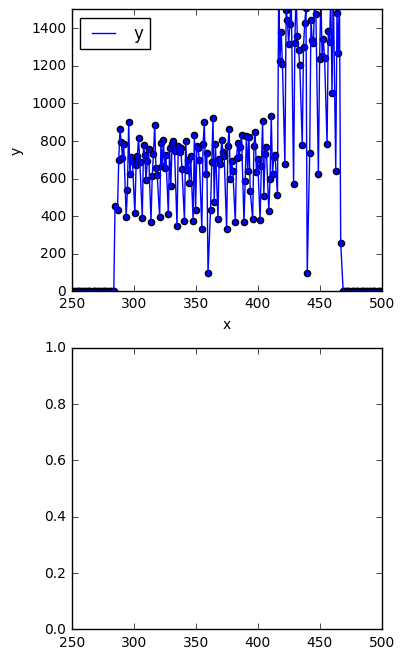

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
df = pd.read_csv('tmp/handle_client_request_tput.wsp.out', skiprows=13, names=["index", "time", "y"])
df = df[df['time'] != 0]
init = float(df['time'].loc[0])
df['x'] = df['time'] - init
df.plot(kind='scatter', ax=ax[0], x='x', y='y')
df.plot(ax=ax[0], x='x', y='y')
ax[0].set_ylim(0, 1500)

#df = pd.read_csv('tmp/user.wsp.out', skiprows=13, names=["index", "time", "y"])
#df = df[df['time'] != 0]
#df['x'] = df['time'] - init
#df.plot(ax=ax[1], x='x', y='y', label="user")

#df0 = pd.read_csv('tmp/sys.wsp.out', skiprows=13, names=["index", "time", "y"])
#df0 = df0[df0['time'] != 0]
#df0['x'] = df0['time'] - init
#df0['ystack'] = df['y'] + df0['y']
#df0.plot(ax=ax[1], x='x', y='ystack', label="user + sys")

for i in [0, 1]:
    ax[i].set_xlim(250, 500)